# Aprendizaje Maquinal [ Proyecto Final ]

---

##### Competencia: CHILD MIND INSTITURE - DETECT SLEEP STATES
El proposito de esta competencia en kaggle es analizar los datos del acelerómetro para monitorear el sueño y permitir a traves de esta investigacion realizar estudios a gran escala sobre el sueño. En última instancia, el trabajo de este concurso podría mejorar la concienciación y la orientación sobre la importancia del sueño.

El objetivo de esta competición es detectar el inicio del sueño y la vigilia. 
Se desarrollará un modelo entrenado con datos de un acelerómetro de muñeca para determinar el estado de sueño de una persona.


#### Dataset

El conjunto de datos comprende alrededor de 500 grabaciones de varios días de datos de acelerómetros de muñeca anotados con dos tipos de eventos: inicio, el comienzo del sueño, y despertar, el final del sueño. La tarea de esta competencia es detectar la ocurrencia de estos dos eventos en la serie del acelerometro.


series_id: identificador único para cada serie de datos del acelerometro, step: pasos para cada observacion, timestamp:la hora registrada en que ocurrio el evento, night: enumera posibles pares de eventos de inicio/despertar y event: tipo de evento onset y wakeup

#### Modelo escogido

Debido al tipo de datos que se manejan en el dataset, resulta más fácil útilizar las redes neuronales, a pesar del tamaño de los datos
fue posible utilizar este modelo. Ademas estos datos son más faciles de usar a traves de **sklearn**, **tensorflow** y **keras**, porque para hacer el modelo se utilizaron redes neuronales.

###     Analisis exploratorio de datos

---

##### Librerias

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as plt

#### Entender las variables

In [146]:
# Lectura del conjunto de datos de prueba
df = pd.read_csv("sample_submission.csv")

In [147]:
# Número de renglones y columnas
df.shape

(6, 5)

##### Este conjunto de datos es una prueba con 5 elementos solo para probar como estan seccionados.

In [148]:
# Primeros 5 elementos
df.head(6)

,row_id,series_id,step,event,score
0,0,038441c925bb,100,onset,0.0
1,1,038441c925bb,105,wakeup,0.0
2,2,03d92c9f6f8a,80,onset,0.5
3,3,03d92c9f6f8a,110,wakeup,0.5
4,4,0402a003dae9,90,onset,1.0
5,5,0402a003dae9,120,wakeup,1.0


##### Conjunto de datos completo

In [149]:
# Lectura del conjunto de datos
df = pd.read_csv("train_events.csv")

In [150]:
# Número de renglones y columnas
df.shape

(14508, 5)

In [151]:
# Nombres de las columnas    
df.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

In [152]:
# Primeros 5 elementos
df.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [153]:
# Datos únicos
df.nunique(axis=0)

series_id     277
night          84
event           2
step         7499
timestamp    9360
dtype: int64

In [154]:
# Datos estadisticos
df.describe()

,night,step
count,14508.000000,9585.000000
mean,15.120072,214352.123944
std,10.286758,141268.408192
min,1.000000,936.000000
25%,7.000000,95436.000000
50%,14.000000,200604.000000
75%,21.000000,317520.000000
max,84.000000,739392.000000


In [155]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,night,step
count,14508.000000,9585.000000
mean,15.120072,214352.123944
std,10.286758,141268.408192
min,1.000000,936.000000
25%,7.000000,95436.000000
50%,14.000000,200604.000000
75%,21.000000,317520.000000
max,84.000000,739392.000000


#### Limpieza de datos

In [156]:
# Valores NaN contados de cada atributo
df.isna().sum()

series_id       0
night           0
event           0
step         4923
timestamp    4923
dtype: int64

In [157]:
# Devuelve un número de valores únicos
df.nunique(axis = 0)

series_id     277
night          84
event           2
step         7499
timestamp    9360
dtype: int64

In [158]:
df_cleaned = df.copy()

In [159]:
# Nombre de las columnas
df_cleaned.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

In [160]:
# Eliminar las columnas con NaN
df_cleaned = df_cleaned.dropna()

In [161]:
df_cleaned.isnull().sum()

series_id    0
night        0
event        0
step         0
timestamp    0
dtype: int64

In [162]:
# Número de renglones y columnas
df_cleaned.shape

(9585, 5)

#### Analisis de relaciones entre variables 

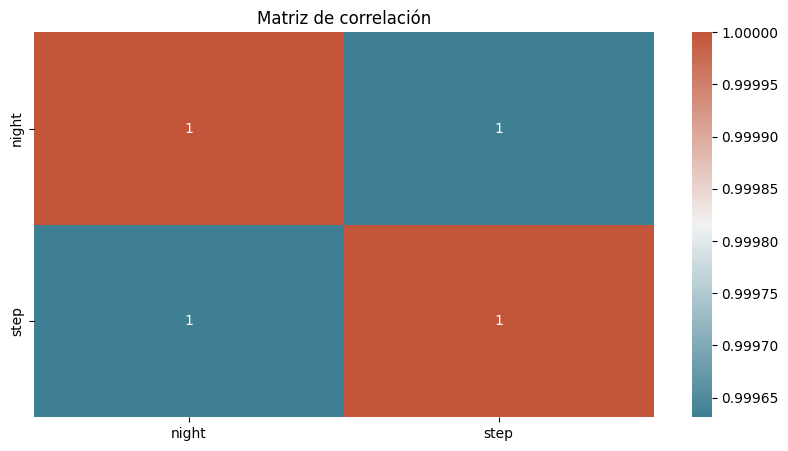

In [163]:
corr = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Matriz de correlación")
plt.show()

In [164]:
df_cleaned.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

event
wakeup    4794
onset     4791
Name: count, dtype: int64


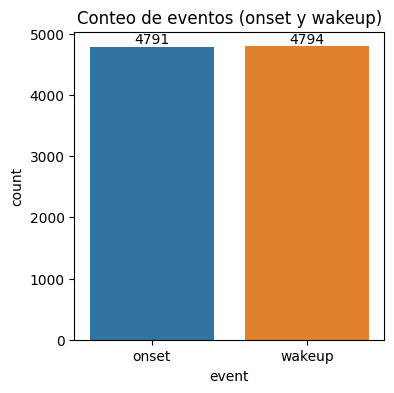

In [165]:
print(df_cleaned['event'].value_counts())

plt.figure(figsize=(4,4))

ax = sns.countplot(data=df_cleaned, x='event')
ax.bar_label(ax.containers[0])
plt.title('Conteo de eventos (onset y wakeup)')
plt.show()

night
1     476
2     454
3     430
5     428
7     417
4     414
6     408
10    397
11    392
8     390
13    380
14    380
12    376
9     370
15    364
16    354
19    340
18    338
20    331
17    331
21    316
22    286
23    230
24    160
25    114
26    104
28     96
27     92
29     86
30     75
31     70
32     62
33     40
34     30
35     20
36     10
37      6
38      6
40      4
39      2
41      2
42      2
43      2
Name: count, dtype: int64


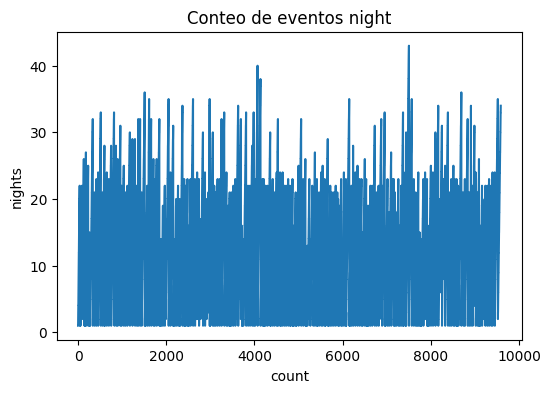

In [166]:
print(df_cleaned['night'].value_counts())

plt.figure(figsize=(6,4))

ax = plt.plot(list(df_cleaned['night']))
plt.xlabel('count')
plt.ylabel('nights')
plt.title('Conteo de eventos night')
plt.show()

step
151200.0    6
83016.0     6
49272.0     5
23796.0     5
194760.0    5
           ..
99528.0     1
92400.0     1
75036.0     1
58632.0     1
581604.0    1
Name: count, Length: 7499, dtype: int64


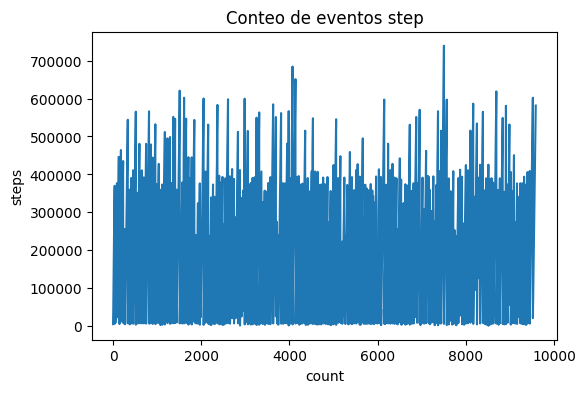

In [167]:
print(df_cleaned['step'].value_counts())

plt.figure(figsize=(6,4))
plt.xlabel('count')
plt.ylabel('steps')
plt.title('Conteo de eventos step')
ax = plt.plot(list(df_cleaned['step']))
plt.show()

<Axes: >

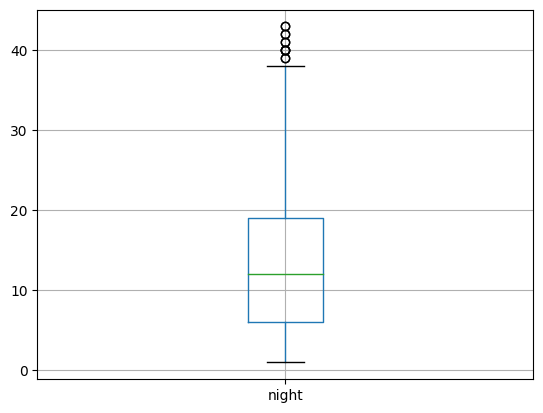

In [168]:
df_cleaned.boxplot('night')


In [169]:
#df_cleaned.boxplot('event')


<Axes: >

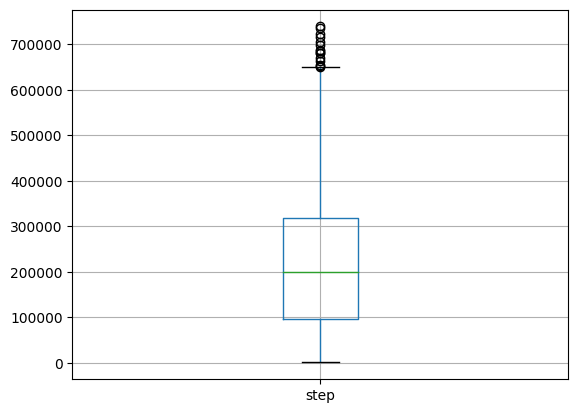

In [170]:
df_cleaned.boxplot('step')

# Problematica

In [171]:
df_cleaned['date'] = df_cleaned['timestamp'].str.split('T', expand=True)[0]
df_cleaned['time'] = df_cleaned['timestamp'].str.split('T', expand=True)[1].str.split('-', expand=True) [0]

In [172]:
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['date']+' '+df_cleaned['time'])
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour


In [173]:
df_cleaned

,series_id,night,event,step,timestamp,date,time,hour
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00,2018-08-14,22:26:00,22
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00,2018-08-15,06:41:00,6
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00,2018-08-15,19:37:00,19
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00,2018-08-16,05:41:00,5
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00,2018-08-16,23:03:00,23
...,...,...,...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0,2017-09-05 09:26:00,2017-09-05,09:26:00,9
14502,fe90110788d2,33,onset,556560.0,2017-09-05 22:30:00,2017-09-05,22:30:00,22
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06 04:07:00,2017-09-06,04:07:00,4
14504,fe90110788d2,34,onset,574620.0,2017-09-06 23:35:00,2017-09-06,23:35:00,23


<Axes: title={'center': 'Hours Distribution'}, xlabel='hour', ylabel='Density'>

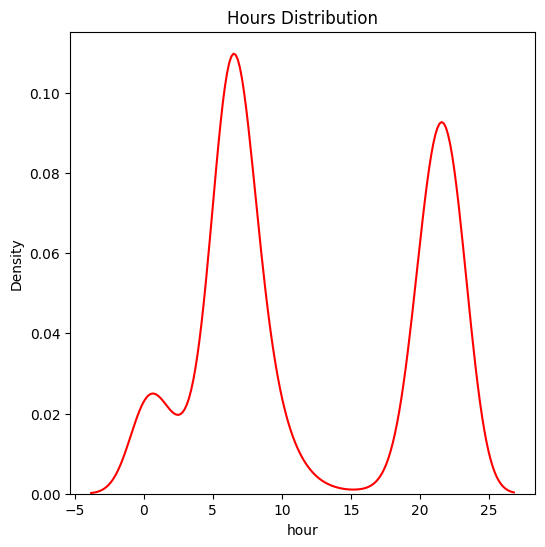

In [174]:
plt.figure(figsize=(6, 6))
plt.title('Hours Distribution')
sns.kdeplot(df_cleaned['hour'],color='red')

Gráfico de dispersion [hora, eventos[onset, wakeup]]


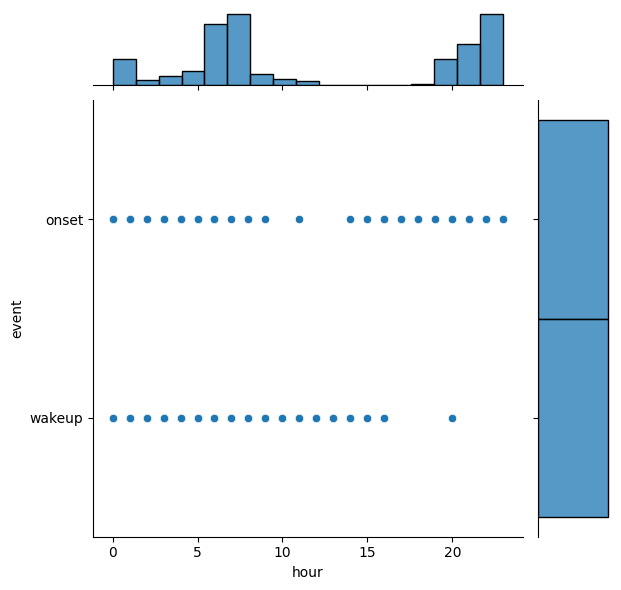

In [175]:
print('Gráfico de dispersion [hora, eventos[onset, wakeup]]')
sns.jointplot(data=df_cleaned, x='hour', y='event')

Gráfico de dispersion [pasos, eventos[onset, wakeup]]


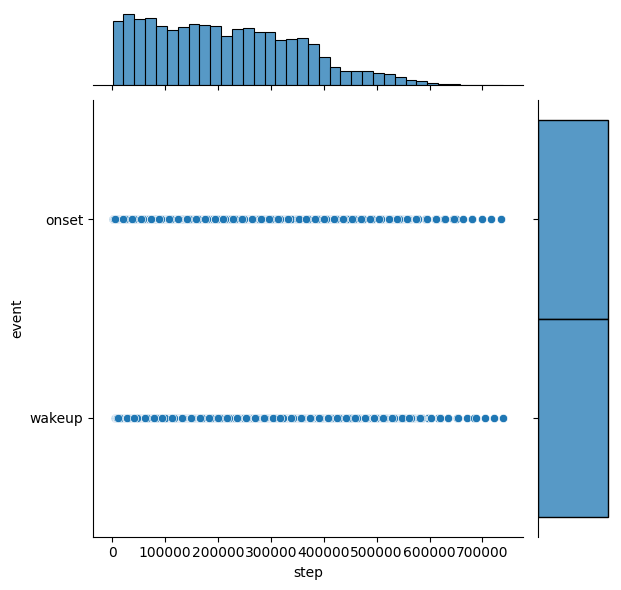

In [176]:
print('Gráfico de dispersion [pasos, eventos[onset, wakeup]]')
sns.jointplot(data=df_cleaned, x='step', y='event')


Gráfico de dispersion [noches, eventos[onset, wakeup]]


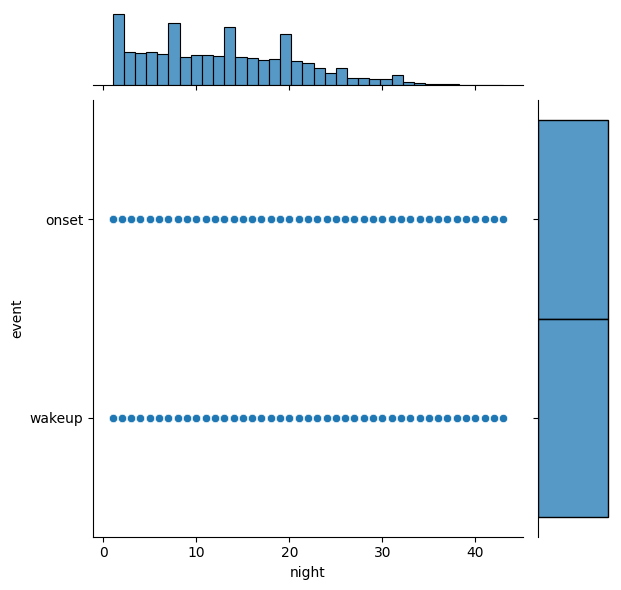

In [177]:
print('Gráfico de dispersion [noches, eventos[onset, wakeup]]')
sns.jointplot(data=df_cleaned, x='night', y='event')


# Redes Neuronales

In [178]:
import numpy
import tensorflow
import sklearn

print("Versión de numpy:", numpy.__version__)
print("Versión de TensorFlow:", tensorflow.__version__)
print("Versión de scikit-learn:", sklearn.__version__)


Versión de numpy: 1.26.1
Versión de TensorFlow: 2.14.0
Versión de scikit-learn: 1.3.1


In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelBinarizer #convierte etiquetes en vectores one-hot
from sklearn.preprocessing import normalize #normaliza las características
from sklearn.model_selection import train_test_split #divide datos para entrenamiento y prueba

In [180]:
df_cleaned.head()

,series_id,night,event,step,timestamp,date,time,hour
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00,2018-08-14,22:26:00,22
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00,2018-08-15,06:41:00,6
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00,2018-08-15,19:37:00,19
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00,2018-08-16,05:41:00,5
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00,2018-08-16,23:03:00,23


In [181]:
# Extrae la columna 'event'
event_column = df_cleaned.pop('event')

# Inserta la columna 'event' al final
df_cleaned['event'] = event_column

In [182]:
df_cleaned = df_cleaned.drop('timestamp', axis=1)

In [183]:
df_cleaned = df_cleaned.drop('series_id', axis=1)

In [184]:
df_cleaned = df_cleaned.drop('date', axis=1)
df_cleaned = df_cleaned.drop('time', axis=1)

In [185]:
df_cleaned.columns

Index(['night', 'step', 'hour', 'event'], dtype='object')

In [186]:
df_cleaned.head()

,night,step,hour,event
0,1,4992.0,22,onset
1,1,10932.0,6,wakeup
2,2,20244.0,19,onset
3,2,27492.0,5,wakeup
4,3,39996.0,23,onset


In [187]:
# Transformamos las etiquetas en vectores canonicos.

event_lb = LabelBinarizer()
Y = event_lb.fit_transform(df_cleaned.event.values)
Y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [188]:
# Normalización de los datos

FEATURES = df_cleaned.columns[0:3]
X_data = df_cleaned[FEATURES].to_numpy()
X_data

array([[1.00000e+00, 4.99200e+03, 2.20000e+01],
       [1.00000e+00, 1.09320e+04, 6.00000e+00],
       [2.00000e+00, 2.02440e+04, 1.90000e+01],
       ...,
       [3.30000e+01, 5.60604e+05, 4.00000e+00],
       [3.40000e+01, 5.74620e+05, 2.30000e+01],
       [3.40000e+01, 5.81604e+05, 9.00000e+00]])

In [189]:
#X_data = normalize(X_data)
# Calcular los valores máximos y mínimos por columnas
max_values = np.max(X_data, axis=0)
min_values = np.min(X_data, axis=0)

# Normalizar los datos
X_data = (X_data - min_values) / (max_values - min_values)
X_data

array([[0.        , 0.00549254, 0.95652174],
       [0.        , 0.01353635, 0.26086957],
       [0.02380952, 0.02614645, 0.82608696],
       ...,
       [0.76190476, 0.75788943, 0.17391304],
       [0.78571429, 0.77686958, 1.        ],
       [0.78571429, 0.78632715, 0.39130435]])

In [190]:
print("Valores mínimos: ", min_values)
print("Valores máximos: ", max_values)

Valores mínimos:  [  1. 936.   0.]
Valores máximos:  [4.30000e+01 7.39392e+05 2.30000e+01]


In [191]:
# Dividimos los datos para entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.2, random_state=10)

# Termina lectura de datos

In [192]:
# Se contabilizan las dimensiones de los datos
print(X_test.shape[0]," ", X_train.shape[0]," ", Y_test.shape[0]," ", Y_train.shape[0])

1917   7668   1917   7668


In [193]:
# Normalizar los datos después de dividirlos
X_train = normalize(X_train, axis=0)
X_test = normalize(X_test, axis=0)

#### Se inicia la creación del modelo

In [194]:
# Se crea el modelo con Keras
# Se crean 3 capas con 3 neuronas en cada X.shape
# Habrán dos capas ocultas una con 100 neuronas y otra con 120
# La capa de salida tendrá 3 neuronas, una por cada clase

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3,)))
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [195]:
# Compilamos el modelo creado
# Se usará categorical_crossentropy para calcular el error de la predicción
# Se usará "adam" para sustituir el descenso del gradiente
# Se reportará la precición

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [196]:
#Resumen del modelo para comprobar que tenemos lo deseado
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               400       
                                                                 
 dense_16 (Dense)            (None, 120)               12120     
                                                                 
 dense_17 (Dense)            (None, 2)                 242       
                                                                 
Total params: 12762 (49.85 KB)
Trainable params: 12762 (49.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [197]:
# Ahora se realiza el entrenamiento
# Esta vez se incluyen los datos de prueba para comparar el desempeño de la red con respecto a los de entrenamiento
# La precición y pérdida se guardaran en "History"

History = model.fit(X_train, Y_train, epochs=100, batch_size=20, validation_data=(X_test, Y_test))

Epoch 1/100
384/384 [==============================] - 7s 11ms/step - loss: 0.5795 - accuracy: 0.7539 - val_loss: 0.6859 - val_accuracy: 0.4471
Epoch 2/100
384/384 [==============================] - 4s 9ms/step - loss: 0.3144 - accuracy: 0.8959 - val_loss: 0.7401 - val_accuracy: 0.6124
Epoch 3/100
206/384 [===============>..............] - ETA: 1s - loss: 0.2892 - accuracy: 0.8966

384/384 [==============================] - 4s 10ms/step - loss: 0.2854 - accuracy: 0.8974 - val_loss: 0.8307 - val_accuracy: 0.6124
Epoch 4/100
384/384 [==============================] - 4s 11ms/step - loss: 0.2719 - accuracy: 0.8971 - val_loss: 0.4605 - val_accuracy: 0.8336
Epoch 5/100
384/384 [==============================] - 3s 9ms/step - loss: 0.2464 - accuracy: 0.8975 - val_loss: 0.6491 - val_accuracy: 0.7720
Epoch 6/100
384/384 [==============================] - 4s 9ms/step - loss: 0.1951 - accuracy: 0.9040 - val_loss: 0.6868 - val_accuracy: 0.8122
Epoch 7/100
384/384 [==============================] - 3s 8ms/step - loss: 0.1280 - accuracy: 0.9589 - val_loss: 0.3996 - val_accuracy: 0.8847
Epoch 8/100
384/384 [==============================] - 3s 8ms/step - loss: 0.0927 - accuracy: 0.9726 - val_loss: 0.5366 - val_accuracy: 0.8399
Epoch 9/100
384/384 [==============================] - 3s 8ms/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.3425 - val_accuracy: 0.9056
Epoch 10/

In [198]:
# Se evalua el rendimiento del modelo

test_lost, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Precisión de los datos de prueba: {test_accuracy}')

11/60 [====>.........................] - ETA: 0s - loss: 0.9784 - accuracy: 0.7500

60/60 [==============================] - 1s 7ms/step - loss: 1.0497 - accuracy: 0.7746
Precisión de los datos de prueba: 0.7746478915214539


In [199]:
# Se guarda el modelo
model.save("modelocompleto_rn.h5")

C:\Users\karla\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


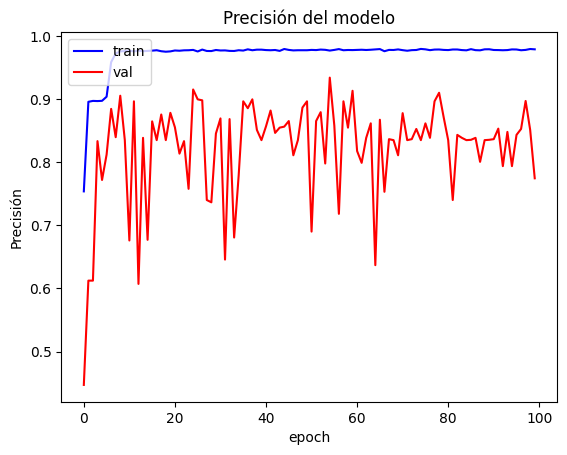

In [200]:
# Ahora veamos gráficamente cómo se comporta el modelo

from matplotlib import pyplot as plt

plt.plot(History.history['accuracy'], color = 'blue')
plt.plot(History.history['val_accuracy'], color = 'red')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


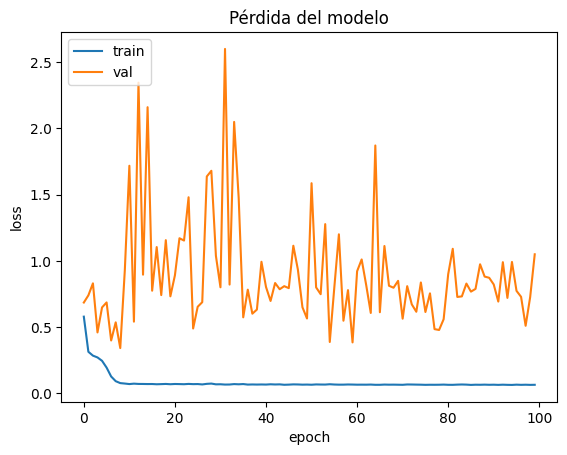

In [201]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Probar el modelo

In [204]:
from tensorflow.keras.models import load_model

In [202]:
df_prueba = pd.read_csv("train_events_reducido.csv")

In [203]:
df_prueba = df_prueba.dropna()

In [205]:
model = load_model('modelocompleto_rn.h5')

In [206]:
datos_nuevos = np.array([4 , 57240, 23])

In [207]:
datos_nuevos_reshaped = datos_nuevos.reshape(-1, 3)

In [208]:
# Predicciones 
predictions = model.predict(datos_nuevos_reshaped)
indice_maximo = np.argmax(predictions)
print("Prediciones: ")
print(predictions)
print(indice_maximo)

1/1 [==============================] - 0s 234ms/step
Prediciones: 
[[1. 0.]]
0


In [209]:
score_probabilidad = np.max(predictions)
print("score: ", score_probabilidad)

score:  1.0
